In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Dataset from Drive
print("Step 1: Loading dataset from Google Drive...")

file_path = '/content/drive/MyDrive/ML/brca.csv'
df = pd.read_csv(file_path)
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("First 5 rows:")
print(df.head())

Step 1: Loading dataset from Google Drive...
Dataset loaded successfully!
Dataset shape: (569, 32)
First 5 rows:
   Unnamed: 0  x.radius_mean  x.texture_mean  x.perimeter_mean  x.area_mean  \
0           1         13.540           14.36             87.46        566.3   
1           2         13.080           15.71             85.63        520.0   
2           3          9.504           12.44             60.34        273.9   
3           4         13.030           18.42             82.61        523.8   
4           5          8.196           16.84             51.71        201.9   

   x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
0            0.09779             0.08129           0.06664   
1            0.10750             0.12700           0.04568   
2            0.10240             0.06492           0.02956   
3            0.08983             0.03766           0.02562   
4            0.08600             0.05943           0.01588   

   x.concave_pts_mean  x.symmetry_mean 

In [3]:
df.isnull().sum()

Unnamed: 0             0
x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

In [4]:
df.describe()

Unnamed: 0  x.radius_mean  x.texture_mean  x.perimeter_mean  \
count  569.000000     569.000000      569.000000        569.000000   
mean   285.000000      14.127292       19.289649         91.969033   
std    164.400426       3.524049        4.301036         24.298981   
min      1.000000       6.981000        9.710000         43.790000   
25%    143.000000      11.700000       16.170000         75.170000   
50%    285.000000      13.370000       18.840000         86.240000   
75%    427.000000      15.780000       21.800000        104.100000   
max    569.000000      28.110000       39.280000        188.500000   

       x.area_mean  x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
count   569.000000         569.000000          569.000000        569.000000   
mean    654.889104           0.096360            0.104341          0.088799   
std     351.914129           0.014064            0.052813          0.079720   
min     143.500000           0.052630            0.019380          0.000000   
25%     420.300000           0.086370            0.064920          0.029560   
50%     551.100000           0.095870            0.092630          0.061540   
75%     782.700000           0.105300            0.130400          0.130700   
max    2501.000000           0.163400            0.345400          0.426800   

       x.concave_pts_mean  x.symmetry_mean  ...  x.radius_worst  \
count          569.000000       569.000000  ...      569.000000   
mean             0.048919         0.181162  ...       16.269190   
std              0.038803         0.027414  ...        4.833242   
min              0.000000         0.106000  ...        7.930000   
25%              0.020310         0.161900  ...       13.010000   
50%              0.033500         0.179200  ...       14.970000   
75%              0.074000         0.195700  ...       18.790000   
max              0.201200         0.304000  ...       36.040000   

       x.texture_worst  x.perimeter_worst  x.area_worst  x.smoothness_worst  \
count       569.000000         569.000000    569.000000          569.000000   
mean         25.677223         107.261213    880.583128            0.132369   
std           6.146258          33.602542    569.356993            0.022832   
min          12.020000          50.410000    185.200000            0.071170   
25%          21.080000          84.110000    515.300000            0.116600   
50%          25.410000          97.660000    686.500000            0.131300   
75%          29.720000         125.400000   1084.000000            0.146000   
max          49.540000         251.200000   4254.000000            0.222600   

       x.compactness_worst  x.concavity_worst  x.concave_pts_worst  \
count           569.000000         569.000000           569.000000   
mean              0.254265           0.272188             0.114606   
std               0.157336           0.208624             0.065732   
min               0.027290           0.000000             0.000000   
25%               0.147200           0.114500             0.064930   
50%               0.211900           0.226700             0.099930   
75%               0.339100           0.382900             0.161400   
max               1.058000           1.252000             0.291000   

       x.symmetry_worst  x.fractal_dim_worst  
count        569.000000           569.000000  
mean           0.290076             0.083946  
std            0.061867             0.018061  
min            0.156500             0.055040  
25%            0.250400             0.071460  
50%            0.282200             0.080040  
75%            0.317900             0.092080  
max            0.663800             0.207500  

[8 rows x 31 columns]

In [14]:
# Step 2: Data Exploration and Preprocessing
print("\nStep 2: Preprocessing data...")

# Drop irrelevant columns
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    print("Dropped column 'Unnamed: 0'")

# Check missing values
missing = df.isnull().sum().sum()
print(f"Total missing values in dataset: {missing}")

# Encode target variable
print("Encoding target variable 'y'...")
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])
print(f"Classes found and encoded: {list(le.classes_)} → {list(range(len(le.classes_)))}")

# Separate features and target
X = df.drop(columns=['y'])
y = df['y']

# Scale features
print("Scaling feature variables...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Feature scaling completed.")


Step 2: Preprocessing data...
Total missing values in dataset: 0
Encoding target variable 'y'...
Classes found and encoded: [np.int64(0), np.int64(1)] → [0, 1]
Scaling feature variables...
Feature scaling completed.


In [7]:
# Step 3: Split Data
print("\nStep 3: Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Step 3: Splitting data into training and testing sets...
Training set size: 455 samples
Testing set size: 114 samples


In [8]:
# Step 4: Train Logistic Regression Model
print("\nStep 4: Training Logistic Regression model...")
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")


Step 4: Training Logistic Regression model...
Model training complete.


In [9]:
# Step 5: Make Predictions
print("\nStep 5: Making predictions on test data...")
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]
print("Predictions completed.")


Step 5: Making predictions on test data...
Predictions completed.



Step 6: Evaluating model...
Confusion Matrix:
[[71  1]
 [ 3 39]]


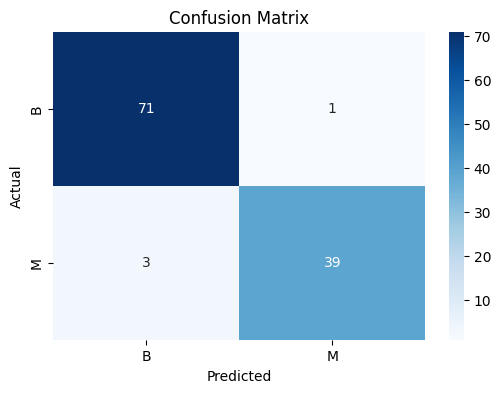

Accuracy:  0.9649
Precision: 0.9750
Recall:    0.9286

Step 6: Evaluating model...
Confusion Matrix:
[[71  1]
 [ 3 39]]


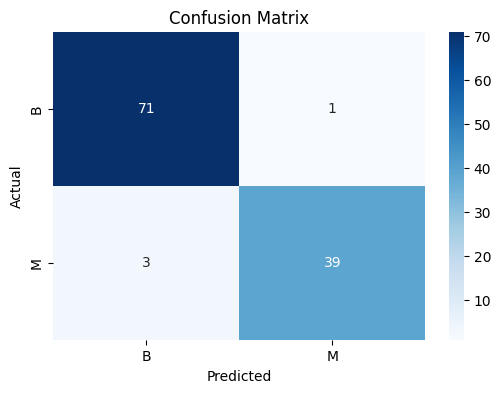

Accuracy:  0.9649
Precision: 0.9750
Recall:    0.9286
F1 Score:  0.9512


In [11]:
# Step 6: Evaluate Model
print("\nStep 6: Evaluating model...")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
# Step 6: Evaluate Model
print("\nStep 6: Evaluating model...")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Step 7: Plotting ROC curve and computing AUC...


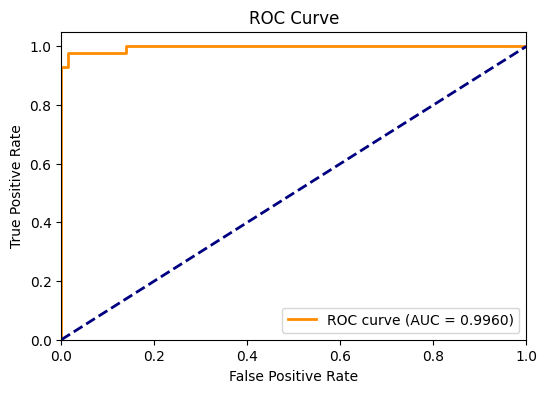

AUC Score: 0.9960

All steps completed successfully!


In [12]:
# Step 7: Plot ROC Curve and Compute AUC
print("\nStep 7: Plotting ROC curve and computing AUC...")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})', color='darkorange', lw=2)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

print("\nAll steps completed successfully!")